In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d1=pd.read_csv('data/book1.csv')

In [3]:
d1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [4]:
print(d1['Target'].value_counts())

Robert-Baratheon    41
Tyrion-Lannister    41
Sansa-Stark         31
Robb-Stark          22
Tywin-Lannister     20
                    ..
Desmond              1
Hosteen-Frey         1
Jommo                1
Grenn                1
Ulf-son-of-Umar      1
Name: Target, Length: 143, dtype: int64


In [5]:
b1 = nx.Graph()


In [6]:
for _, edge in d1.iterrows():
    b1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [7]:
print("Total number of nodes: ", int(b1.number_of_nodes())) 

Total number of nodes:  187


In [8]:
print("Total number of edges: ", int(b1.number_of_edges())) 

Total number of edges:  684


In [ ]:
plt.figure(figsize =(20, 20)) 
nx.draw(b1, with_labels= True)

In [ ]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(b1)

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 10 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print(sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

In [57]:
sorted_deg_cen_book1

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572)]

In [58]:
deg_cen_book1

{'Addam-Marbrand': 0.010752688172043012,
 'Jaime-Lannister': 0.15591397849462366,
 'Tywin-Lannister': 0.11827956989247312,
 'Aegon-I-Targaryen': 0.010752688172043012,
 'Daenerys-Targaryen': 0.11290322580645162,
 'Eddard-Stark': 0.3548387096774194,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
 'Alliser-Thorne': 0.05376344086021506,
 'Bowen-Marsh': 0.02688172043010753,
 'Chett': 0.016129032258064516,
 'Clydas': 0.005376344086021506,
 'Jeor-Mormont': 0.06989247311827958,
 'Jon-Snow': 0.19892473118279572,
 'Samwell-Tarly': 0.06451612903225806,
 'Aerys-II-Targaryen': 0.03225806451612903,
 'Brandon-Stark': 0.03225806451612903,
 'Gerold-Hightower': 0.02688172043010753,
 'Jon-Arryn': 0.08064516129032259,
 'Robert-Baratheon': 0.2688172043010753,
 'Aggo': 0.03225806451612903,
 'Drogo': 0.10215053763440861,
 'Jhogo': 0.03225806451612903,
 'Jorah-Mormont': 0.06989247311827958,
 'Quaro': 0.02688172043010753,
 'Rakharo': 0.02688172043010753,
 'Albett': 0.016129032258064516,
 'Halder': 0.

          0         1         2         3
0  1.000000  0.868989  0.930315  0.664590
1  0.868989  1.000000  0.796965  0.578166
2  0.930315  0.796965  1.000000  0.838933
3  0.664590  0.578166  0.838933  1.000000


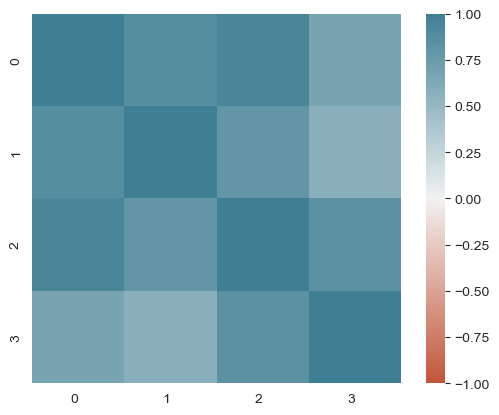

In [59]:
import seaborn  as sns
measures = [nx.eigenvector_centrality(b1), 
            nx.closeness_centrality(b1), 
            nx.degree_centrality(b1),
           nx.betweenness_centrality(b1)]

# Creating the correlation DataFrame
cor5 = pd.DataFrame.from_records(measures)

# Calculating the correlation
corr5=cor5.T.corr()
print(corr5)
ax = sns.heatmap(
    corr5, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=360,
    horizontalalignment='right'
);

In [61]:
def process_book(book_number):
    # Read the data
    data = pd.read_csv(f'data/book{book_number}.csv')

    # Create a graph
    graph = nx.Graph()
    for _, edge in data.iterrows():
        graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

    # Calculate the degree centrality
    deg_cen = nx.degree_centrality(graph)

    # Filter the selected characters
    selected_characters = ['Jon-Snow', 'Daenerys-Targaryen', 'Tyrion-Lannister', 'Arya-Stark', 'Jaime-Lannister']
    filtered_cen = {k: deg_cen[k] for k in selected_characters}

    # Create a DataFrame
    df = pd.DataFrame(filtered_cen, index=[0])

    # Add the book number as a column
    df['book'] = book_number

    return df